In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
CrimeSurvey= pd.read_csv('../data/CrimeSurvey.csv')
CrimeSurvey.replace(9999,np.NaN, inplace=True)
CrimeSurvey.replace({'Sex': {1:'Male', 2:'Female'}}, inplace=True)
CrimeSurvey.replace({'Education': {1:'None', 2:'GCSE', 3:'ALevel', 4:'University', 5:'Other'}}, inplace=True)
CrimeSurvey.replace({'EthnicGroup':{1:'White', 2:'Mixed', 3:'Asian or Asian British', 4:'Black or Black British', 5:'Chinese or other'}}, inplace=True)

CrimeSurvey['effectx']=(CrimeSurvey.effectx-CrimeSurvey.effectx.mean())/CrimeSurvey.effectx.std()
CrimeSurvey['confx']=(CrimeSurvey.confx-CrimeSurvey.confx.mean())/CrimeSurvey.confx.std()
CrimeSurvey['fairx']=(CrimeSurvey.fairx-CrimeSurvey.fairx.mean())/CrimeSurvey.fairx.std()
CrimeSurvey['effectx']=(CrimeSurvey.effectx-CrimeSurvey.effectx.mean())/CrimeSurvey.effectx.std()
CrimeSurvey.mean(numeric_only=True)


CrimeSurvey.to_csv('../data/CrimeData.csv', index=False)
CrimeSurvey

,ID,Sex,Age,AgeGroup,EthnicGroup,Education,SES,DeprivationIndex,Victim,effectx,fairx,confx,antisocx
0,135230170.0,Male,45.0,4,White,University,2.0,3.0,0.0,NaN,NaN,2.290506,3.42
1,135230210.0,Male,28.0,2,White,University,1.0,4.0,0.0,-0.755949,NaN,-0.349198,-0.52
2,135231010.0,Female,58.0,5,Black or Black British,None,5.0,2.0,0.0,-1.344910,-0.544786,0.381797,2.27
3,135231210.0,Male,70.0,6,Asian or Asian British,GCSE,3.0,4.0,0.0,NaN,NaN,NaN,NaN
4,135233210.0,Female,64.0,5,White,Other,5.0,5.0,0.0,0.152448,0.914933,-0.613168,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,147638210.0,Male,43.0,3,White,University,1.0,NaN,0.0,-0.436513,NaN,-1.029429,0.31
9296,147639090.0,Male,70.0,6,White,None,5.0,NaN,0.0,0.132483,NaN,1.051876,-0.45
9297,147639130.0,Female,80.0,7,White,None,5.0,NaN,0.0,NaN,NaN,0.808211,0.27
9298,147639250.0,Male,86.0,7,White,University,1.0,NaN,0.0,-0.446495,0.408086,1.711802,-0.56


<Axes: xlabel='Age', ylabel='confx'>

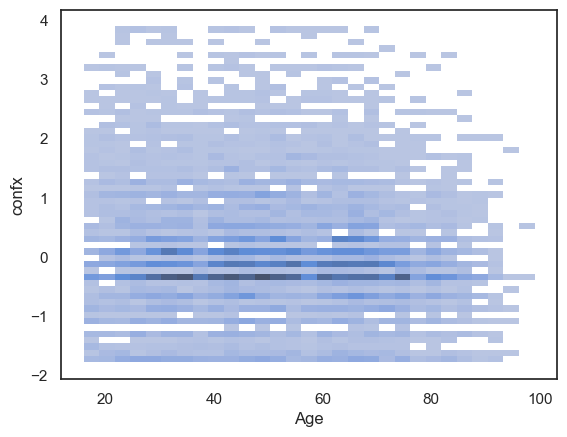

In [3]:
sns.histplot(data=CrimeSurvey, x='Age', y='confx')

/Users/joreilly/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='AgeGroup', ylabel='confx'>

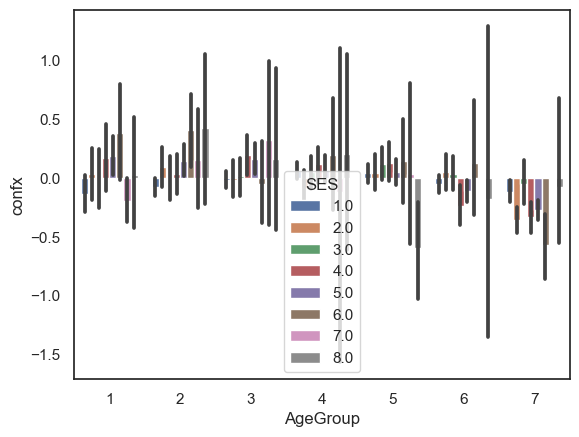

In [4]:
sns.barplot(data=CrimeSurvey, y='confx', x='AgeGroup', hue='SES')

0.1560215053763441

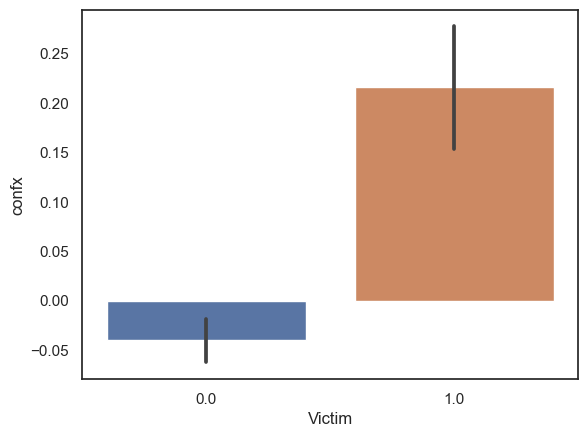

In [5]:
sns.barplot(data=CrimeSurvey, y='confx', x='Victim')

CrimeSurvey.Victim.mean()

In [6]:
sns.histplot(data=CrimeSurvey, x='Age', bins=range(15,100,5), hue='bcsvictim')

ValueError: Could not interpret value `bcsvictim` for parameter `hue`

<Axes: xlabel='confx', ylabel='Density'>

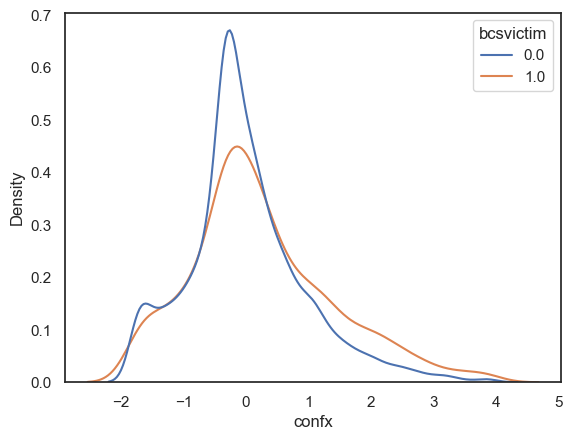

In [93]:
sns.kdeplot(data=CrimeSurvey, x='confx', hue='bcsvictim', common_norm=False)

<Axes: xlabel='confx', ylabel='Density'>

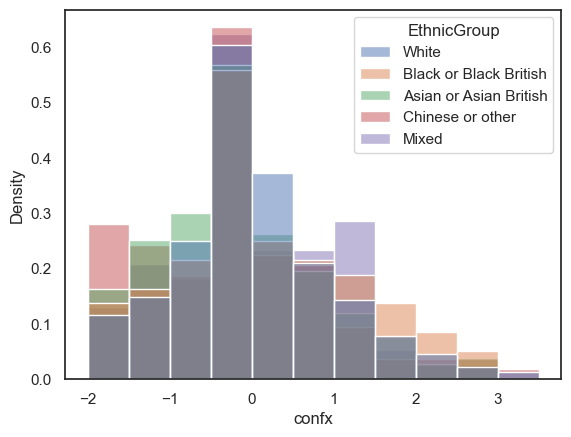

In [66]:
sns.histplot(data=CrimeSurvey, x='confx', hue='EthnicGroup', common_norm=False, bins=np.arange(-2,4,0.5), stat='density')

In [69]:
CrimeSurvey.mean(numeric_only=True)

ID                  1.387841e+08
Sex                 1.537097e+00
Age                 5.137979e+01
Education           2.840250e+00
SES                 2.946559e+00
DeprivationIndex    3.051918e+00
bcsvictim           1.560215e-01
effectx             7.283338e-03
fairx               7.426611e-03
confx               3.394540e-02
antisocx           -8.702167e-04
dtype: float64

In [70]:
CrimeSurvey.std(numeric_only=True)

ID                  4.422820e+06
Sex                 4.986487e-01
Age                 1.865658e+01
Education           1.247993e+00
SES                 1.852283e+00
DeprivationIndex    1.394853e+00
bcsvictim           3.628952e-01
effectx             1.001765e+00
fairx               9.864915e-01
confx               9.849591e-01
antisocx            1.000872e+00
dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

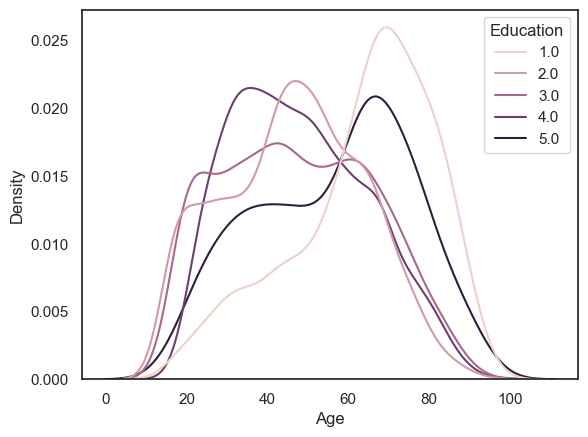

In [96]:
sns.kdeplot(data=CrimeSurvey, x='Age', hue='Education', common_norm=False)

<Axes: xlabel='confx', ylabel='Density'>

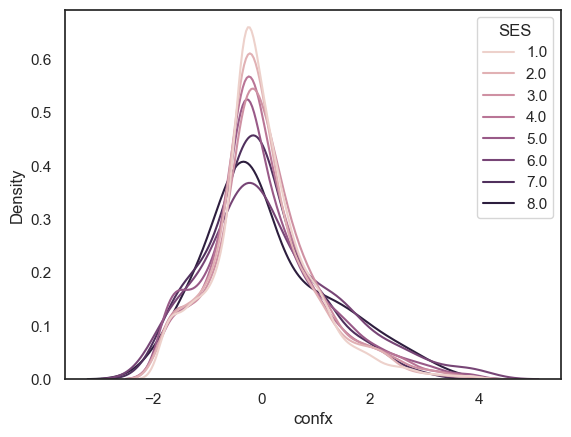

In [114]:
sns.kdeplot(data=CrimeSurvey, x='confx', hue='SES', common_norm=False)

<Axes: xlabel='EthnicGroup', ylabel='Victim'>

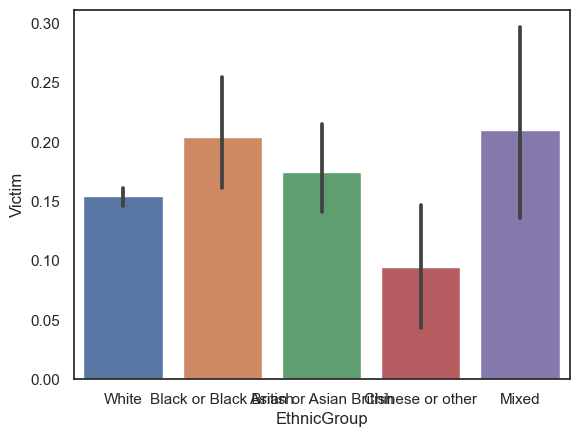

In [117]:
sns.barplot(data=CrimeSurvey, x='EthnicGroup', y='Victim')

<Axes: xlabel='SES', ylabel='Victim'>

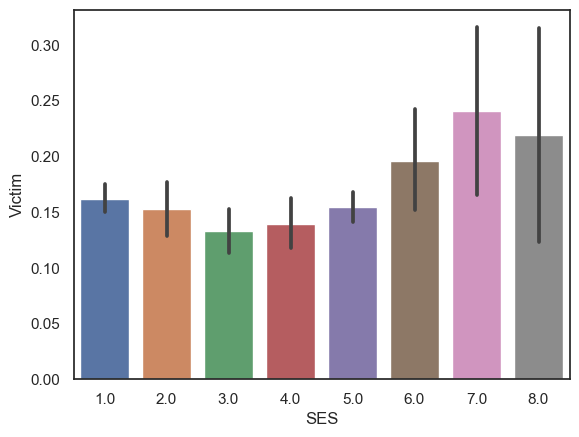

In [118]:
sns.barplot(data=CrimeSurvey, x='SES', y='Victim')

<Axes: xlabel='Sex', ylabel='Victim'>

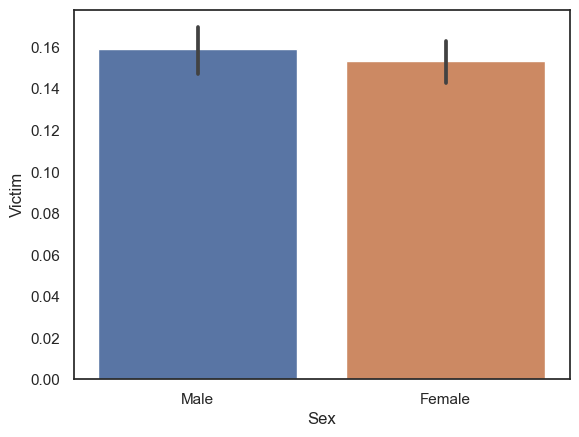

In [119]:
sns.barplot(data=CrimeSurvey, x='Sex', y='Victim')

<Axes: xlabel='EthnicGroup', ylabel='Victim'>

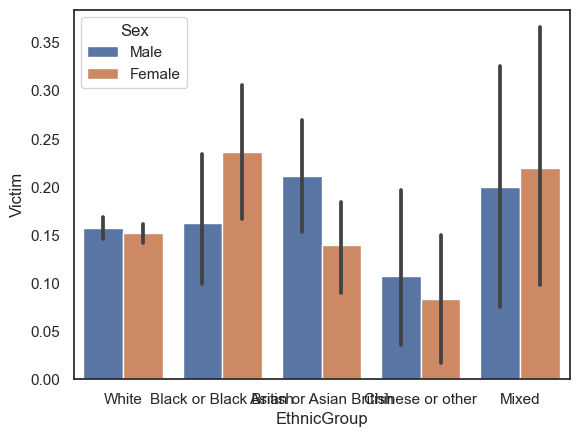

In [123]:
sns.barplot(data=CrimeSurvey, x='EthnicGroup', y='Victim', hue='Sex')

<Axes: xlabel='DeprivationIndex', ylabel='Victim'>

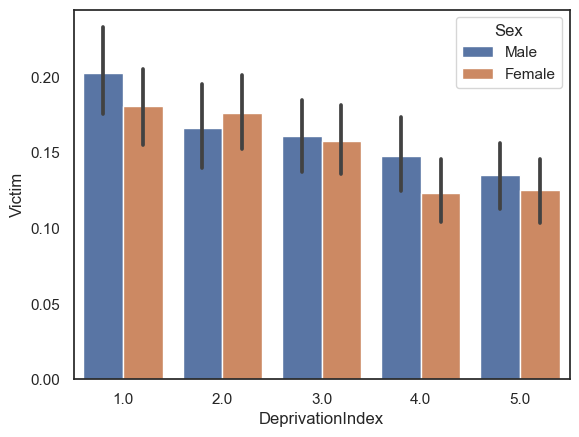

In [124]:
sns.barplot(data=CrimeSurvey, x='DeprivationIndex', y='Victim', hue='Sex')

<Axes: xlabel='SES', ylabel='Victim'>

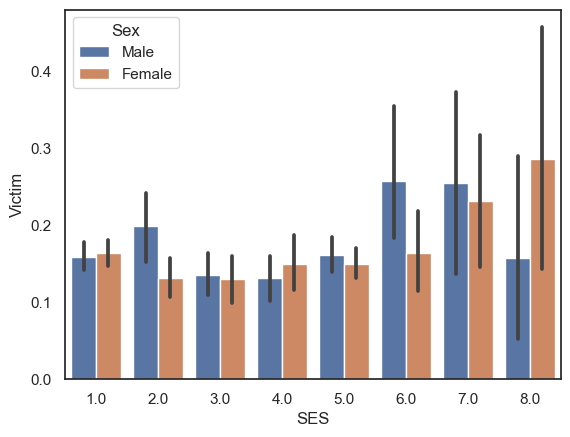

In [125]:
sns.barplot(data=CrimeSurvey, x='SES', y='Victim', hue='Sex')